# Data Science Intern @Lets Grow More 
# September

## Developer :Abhinav Pratap Singh


# Task 8: Predict the next word.

# Importing necessary libraries

In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [2]:
#loading the dataset
text = open('1661-0.txt',encoding='UTF-8').read().lower()
print('corpus length:\t', len(text))

corpus length:	 581888


## Splitting the dataset into each word in order

In [3]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)
words

['project',
 'gutenberg',
 's',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'net',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'arthur',
 'conan',
 'doyle',
 'release',
 'date',
 'november',
 '29',
 '2002',
 'ebook',
 '1661',
 'last',
 'updated',
 'may',
 '20',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'produced',
 'by',
 'an',
 'ano

In [4]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

### Feature Engineering:

In [5]:
word_len = 5
prev_words = []
next_words = []
for i in range(len(words) - word_len):
    prev_words.append(words[i:i + word_len])
    next_words.append(words[i + word_len])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [6]:
X = np.zeros((len(prev_words), word_len, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [7]:
#a look at a single sequence of words
print(X[0][0])

[False False False ... False False False]


## Building the RNN

In [8]:
#Building the LSTM model,which is a very powerful RNN.
model = Sequential()
model.add(LSTM(128, input_shape=(word_len, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

## Training the Next Word Prediction Model:

In [9]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

D:\ANACONDA\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
811/811 [==============================] - 146s 176ms/step - loss: 6.0008 - accuracy: 0.1080 - val_loss: 7.0959 - val_accuracy: 0.1018
Epoch 2/10
811/811 [==============================] - 156s 193ms/step - loss: 5.7810 - accuracy: 0.1489 - val_loss: 7.9147 - val_accuracy: 0.1071
Epoch 3/10
811/811 [==============================] - 148s 183ms/step - loss: 5.7355 - accuracy: 0.1760 - val_loss: 7.7974 - val_accuracy: 0.1084
Epoch 4/10
811/811 [==============================] - 140s 173ms/step - loss: 5.4314 - accuracy: 0.2108 - val_loss: 8.3855 - val_accuracy: 0.1003
Epoch 5/10
811/811 [==============================] - 142s 175ms/step - loss: 5.1032 - accuracy: 0.2503 - val_loss: 8.5711 - val_accuracy: 0.0994
Epoch 6/10
811/811 [==============================] - 142s 175ms/step - loss: 4.7724 - accuracy: 0.2929 - val_loss: 8.8660 - val_accuracy: 0.0893
Epoch 7/10
811/811 [==============================] - 144s 177ms/step - loss: 4.4629 - accuracy: 0.3347 - val_loss: 8.8160 -

In [10]:
#saving the model for future 
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [11]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## Evaluation of  the Next Word Prediction Model:

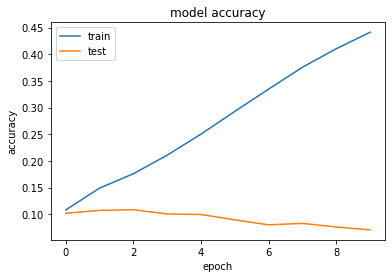

In [12]:
#model accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

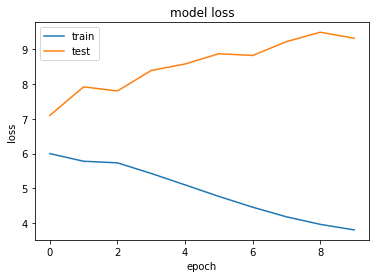

In [13]:
#model loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Testing Next Word Prediction Model:

In [14]:
def prepare_input(text):
    x = np.zeros((1, word_len, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x


In [15]:
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [16]:
def prepare_input(text):
    x = np.zeros((1, word_len, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## To choose the best possible n words:

In [17]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [18]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

## Function for prediction:

In [19]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

<p style = "font-size:16px"

In [20]:
q =  "Light the candle instead of cursuing darkness"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

correct sentence:  Light the candle instead of cursuing darkness
Sequence:  light the candle instead of
light
the
candle
instead
of
next possible words:  ['so', 'us', 'you', 'him', 'little']
